In [38]:
# from pyGSI.diags import Conventional
from diags import Conventional
import numpy as np
import pandas as pd
from filter_df import filter_df
from plots import base_plots, wind_base_plots

In [39]:
pd.set_option('display.max_columns', None) # so I can see all columns on the df

# Filter dataframe returned by PyGSI

## Read diag files

In [40]:
#temperature diag files
diag_t_ges_fp = '../example_data/diag_conv_t_ges.2024031812.nc4'
diag_t_anl_fp = '../example_data/diag_conv_t_anl.2024031812.nc4'

#wind diag files
diag_uv_ges_fp = '../example_data/diag_conv_uv_ges.2024031812.nc4'
diag_uv_anl_fp = '../example_data/diag_conv_uv_anl.2024031812.nc4'

In [41]:
#Temperature Diag file
# diag_ges = Conventional(diag_t_ges_fp)
# diag_anl = Conventional(diag_t_anl_fp)

#Wind Diag file
diag_ges = Conventional(diag_uv_ges_fp)
diag_anl = Conventional(diag_uv_anl_fp)

## Query data

In [42]:
df_ges = diag_ges.get_data()
df_anl = diag_anl.get_data()

In [43]:
df_anl.head()

,station_id,observation_class,observation_type,observation_subtype,latitude,longitude,station_elevation,pressure,height,time,prep_qc_mark,setup_qc_mark,nonlinear_qc_var_jb,prep_use_flag,analysis_use_flag,nonlinear_qc_rel_wgt,errinv_input,errinv_adjust,errinv_final,wind_reduction_factor_at_10m,u_observation,u_omf_adjusted,u_omf_unadjusted,v_observation,v_omf_adjusted,v_omf_unadjusted,dominant_sfc_type,model_terrain,u_hofx_unadjusted,u_hofx_adjusted,v_hofx_unadjusted,v_hofx_adjusted
0,IR272,uv,245,0,5.68508,202.797836,110092.0,894.200012,68.0,-1.0,2.0,1.000000e+09,0.0,0.0,1.0,4.0,0.526316,0.526316,5.263158e-01,1.0,-8.950697,-1.464624,-1.464624,0.940756,2.020810,2.020810,0.0,0.0,-7.486073,-7.486073,-1.080054,-1.080054
1,IR272,uv,245,0,6.12804,202.857498,110059.0,900.799988,59.0,-1.0,15.0,1.000000e+09,0.0,100.0,0.0,4.0,0.526316,0.526316,2.938736e-39,1.0,-9.521784,-2.333984,-2.333984,1.850847,3.969705,3.969705,0.0,0.0,-7.187799,-7.187799,-2.118857,-2.118857
2,IR272,uv,245,0,6.07117,203.080261,110052.0,930.799988,56.0,-1.0,15.0,1.000000e+09,0.0,100.0,0.0,4.0,0.526316,0.526316,2.938736e-39,1.0,-8.705514,-1.873541,-1.873541,1.850414,5.598646,5.598646,0.0,0.0,-6.831973,-6.831973,-3.748232,-3.748232
3,IR272,uv,245,0,6.34784,203.166962,110077.0,827.799988,69.0,-1.0,15.0,1.000000e+09,0.0,100.0,0.0,4.0,0.526316,0.526316,5.263158e-01,1.0,-6.066584,-0.464204,-0.464204,-0.637624,-1.757761,-1.757761,0.0,0.0,-5.602379,-5.602379,1.120137,1.120137
4,IR272,uv,245,0,6.10788,203.118515,110057.0,933.700012,49.0,-1.0,15.0,1.000000e+09,0.0,100.0,0.0,4.0,0.526316,0.526316,2.938736e-39,1.0,-4.885854,1.953704,1.953704,2.935717,6.706806,6.706806,0.0,0.0,-6.839558,-6.839558,-3.771089,-3.771089


In [44]:
# for col in df_anl.columns:
#     # Check if all elements in the column are equal between _anl and _ges
#     if not (df_anl[col] == df_ges[col]).all():
#         print(f"Column '{col}' is different.")

## Testing PyGSI filter_obs function

### Set filter arguments

In [45]:
elv_range = (0,20)
p_range = (500,1000)
err_range = (0, 4)

# Lat and lon ranges for colorado
co_lats = (37, 41)
co_lons = (360-109, 360-102) #to convert from deg west to deg east

In [46]:
#wind examples
# df_anl_fil = filter_df(df_anl, hem='CONUS')
# df_ges_fil = filter_df(df_ges, hem='CONUS')
df_anl_fil = filter_df(df_anl, obs_types= [287], lat_range=co_lats, lon_range=co_lons)
df_ges_fil = filter_df(df_ges, obs_types= [287], lat_range=co_lats, lon_range=co_lons)

# temp examples
# df_anl_fil = filter_df(df_anl, obs_types= [187], hem='CONUS')
# df_ges_fil = filter_df(df_ges, obs_types= [187], hem='CONUS')
# df_anl_fil = filter_df(df_anl, obs_types= [187], lat_range=co_lats, lon_range=co_lons)
# df_ges_fil = filter_df(df_ges, obs_types= [187], lat_range=co_lats, lon_range=co_lons)
print(len(df_anl_fil))
print(len(df_ges_fil))

91
91


## Testing base plots

Observation Type: 287

Proportion Assimilated: 0.791208803653717

U Observation Histogram Statistics: 
n: 91, mean: 1.1450549364089966, std: 2.090757369995117, max: 7.099999904632568, min: -3.5

U OmF Histogram Statistics: 
n: 91, mean: 0.37752601504325867, std: 1.8200117349624634, max: 4.478912830352783, min: -2.440760850906372

U OmA Histogram Statistics: 
n: 91, mean: 0.0741645023226738, std: 0.5001339912414551, max: 1.508601427078247, min: -1.9756585359573364

V Observation Histogram Statistics: 
n: 91, mean: -0.0714285746216774, std: 1.6294869184494019, max: 3.799999952316284, min: -4.099999904632568

V OmF Histogram Statistics: 
n: 91, mean: 0.37752601504325867, std: 1.8200117349624634, max: 4.478912830352783, min: -2.440760850906372

U OmA Histogram Statistics: 
n: 91, mean: 0.0741645023226738, std: 0.5001339912414551, max: 1.508601427078247, min: -1.9756585359573364



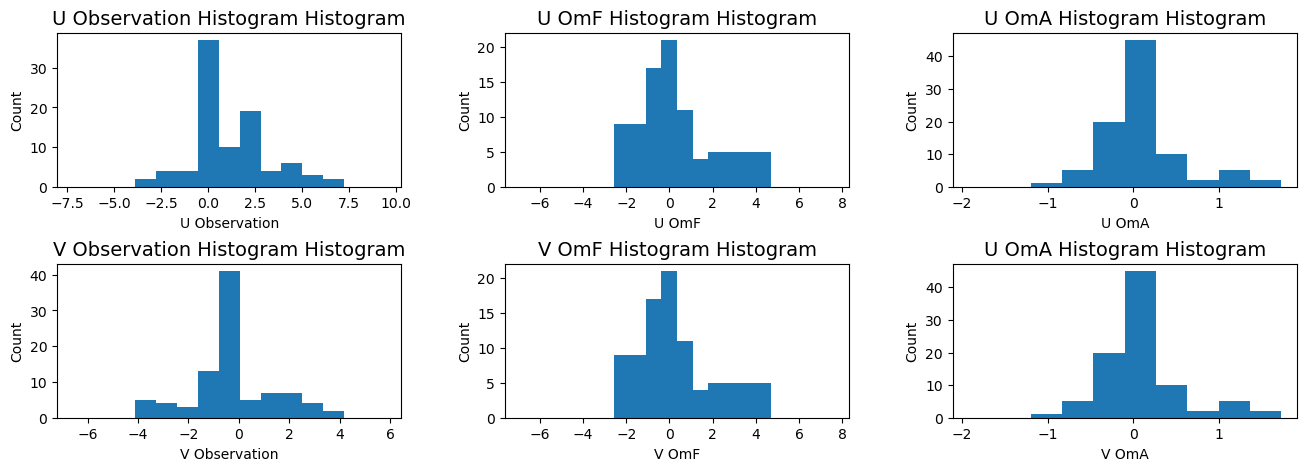

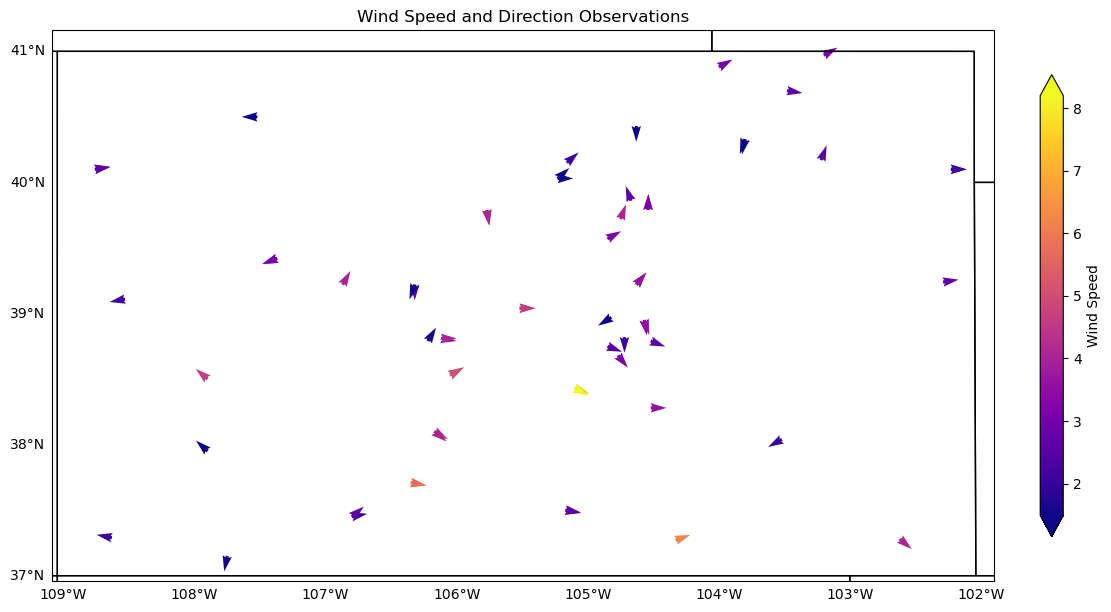

In [48]:
# base_plots(df_anl_fil, df_ges_fil, diag_ges.metadata)
wind_base_plots(df_anl_fil, df_ges_fil, diag_ges.metadata)
